
# Red Neuronal profunda regresión




In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Cargar fichero

In [ ]:
# Lee el archivo
dataset = pd.read_csv("Celsius_Fahrenheit_Entrenamiento.csv")

# Verificación de tipos de datos
print(dataset.dtypes)
# Mostrando las filas superiores
dataset.head()


Celsius         int64
Fahrenheit    float64
dtype: object


,Celsius,Fahrenheit
0,-67,-88.6
1,40,104.0
2,-97,-142.6
3,57,134.6
4,-50,-58.0


Últimas 10 filas del conjunto de datos    

In [ ]:
dataset.tail(10)


,Celsius,Fahrenheit
990,-65,-85.0
991,64,147.2
992,-66,-86.8
993,34,93.2
994,-88,-126.4
995,-80,-112.0
996,50,122.0
997,18,64.4
998,47,116.6
999,-67,-88.6


Descripción del conjunto de datos



In [ ]:
dataset.describe() #description about dataset

,Celsius,Fahrenheit
count,1000.000000,1000.000000
mean,-0.029000,31.947800
std,57.334173,103.201511
min,-100.000000,-148.000000
25%,-50.000000,-58.000000
50%,-2.000000,28.400000
75%,50.000000,122.000000
max,100.000000,212.000000


Información de los datos

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     1000 non-null   int64  
 1   Fahrenheit  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


## Separados los datos en Celsiud y Fahrenheit
Cuando haces .reshape(-1, 1), estás esencialmente convirtiendo un array unidimensional en un array bidimensional donde la segunda dimensión tiene un tamaño de 1. Esto es útil en muchas situaciones, especialmente cuando estás trabajando con modelos de aprendizaje automático que requieren datos bidimensionales.
Esta transformación es necesaria porque algunas operaciones en TensorFlow esperan tensores bidimensionales

In [ ]:
# Separar las características (Celsius) y las etiquetas (Fahrenheit)
X_train = dataset['Celsius'].values.reshape(-1, 1)
Y_train = dataset['Fahrenheit'].values.reshape(-1, 1)



## Normalizamos los datos
Esto hace más facil al modelo la convergencia

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_train)

## Dividir datos en conjuntos de entrenamiento y prueba.

train_test_split de scikit-learn, la función toma tu conjunto de datos y lo divide en conjuntos de entrenamiento y prueba de manera aleatoria. La aleatoriedad se controla mediante la semilla (random_state). Al establecer random_state=42, garantizas que, en diferentes ejecuciones del código con la misma semilla, obtendrás la misma división de datos aleatoria.

In [ ]:

celsius_train, celsius_test, fahrenheit_train, fahrenheit_test = train_test_split(X, Y_train, test_size=0.2, random_state=42)



## Definir la red neuronal profunda con dos capas densas es decir completamente conectadas.


*   Una caráctiristica de entrada
*   Dos capas densas con una función de activación relu
*   Una salida



In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

## Declaramos nuestro compilador con el algoritmo de optimización y perdida

Un optimizador es un algoritmo que ajusta los pesos del modelo durante el entrenamiento para minimizar la función de pérdida



*   **Adam** es el optimizar para la tasa de aprendizaje. Determina la magnitud de los ajustes que se realizan en los pesos del modelo durante el proceso de entrenamiento. Un valor más alto de la tasa de aprendizaje significa ajustes más grandes, pero también puede llevar a una convergencia inestable o a que el modelo no converja en absoluto. Es un hiperparámetro que puede necesitar ajustes durante el proceso de experimentación.
*   **loss**='mean_squared_error': La función de pérdida (loss function) se utiliza para medir cuán bien el modelo está realizando en cada iteración durante el entrenamiento. En este caso, la función de pérdida es el error cuadrático medio (mean_squared_error), que se utiliza comúnmente en problemas de regresión. La idea es minimizar esta pérdida, lo que significa que el modelo está haciendo predicciones que están cerca de los valores reales.




In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

## Entrenamos a nuestro modelo con los datos de entrenamiento y adeñas los de validación.

Utilizamos 500 epocas o iteraciones para el entrenamiento y 32 de bach size.

Bach Sice: Se refiere al número de ejemplos de entrenamiento. En lugar de actualizar los pesos de la red después de cada ejemplo de entrenamiento individual (entrenamiento en línea), el entrenamiento por lotes implica actualizar los pesos después de procesar un conjunto de ejemplos a la vez (un lote).  Por ejemplo, si batch_size=32, significa que cada vez que se pasa un lote de 32 ejemplos a través de la red, los pesos se actualizan en consecuencia. Suelen ser potencias de 2, como 32, 64, 128

In [ ]:
# Entrenar el modelo con conjunto de entrenamiento y validación
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius_train, fahrenheit_train, epochs=500, batch_size=32, verbose=False, validation_data=(celsius_test, fahrenheit_test))
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/500
25/25 [==============================] - 2s 22ms/step - loss: 11480.5703 - val_loss: 11739.1934
Epoch 2/500
25/25 [==============================] - 0s 6ms/step - loss: 11103.3438 - val_loss: 11098.9434
Epoch 3/500
25/25 [==============================] - 0s 8ms/step - loss: 10214.7676 - val_loss: 9877.0176
Epoch 4/500
25/25 [==============================] - 0s 7ms/step - loss: 8974.4238 - val_loss: 8580.2773
Epoch 5/500
25/25 [==============================] - 0s 7ms/step - loss: 7849.1426 - val_loss: 7449.4448
Epoch 6/500
25/25 [==============================] - 0s 5ms/step - loss: 6636.0400 - val_loss: 6000.7476
Epoch 7/500
25/25 [==============================] - 0s 8ms/step - loss: 5190.0337 - val_loss: 4490.3779
Epoch 8/500
25/25 [==============================] - 0s 9ms/step - loss: 3881.0635 - val_loss: 3374.2642
Epoch 9/500
25/25 [==============================] - 0s 6ms/step - loss: 3051.3694 - val_loss: 2676.8618
Epoch 10/500
25/25 [=

In [ ]:
# Evaluar el modelo
loss = modelo.evaluate(celsius_test, fahrenheit_test)
print(f"Pérdida en el conjunto de prueba: {loss}")

7/7 [==============================] - 0s 2ms/step - loss: 1.7708e-05
Pérdida en el conjunto de prueba: 1.770846574800089e-05


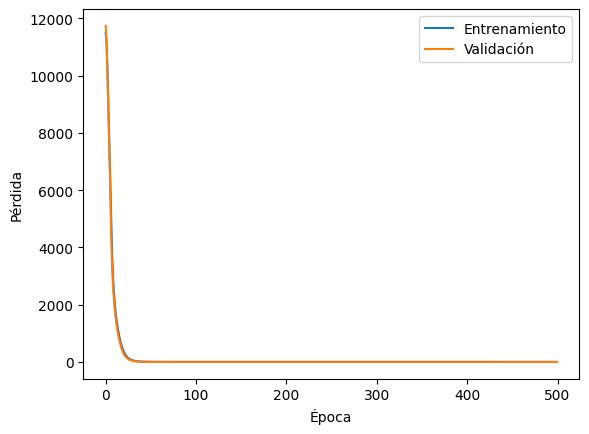

In [ ]:
# Visualizar la pérdida a lo largo de las épocas (entrenamiento y validación)
import matplotlib.pyplot as plt
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Probar

In [ ]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 105ms/step
El resultado es [[30375.908]] fahrenheit!


In [ ]:
y_pred = modelo.predict(celsius_test)

7/7 [==============================] - 0s 2ms/step


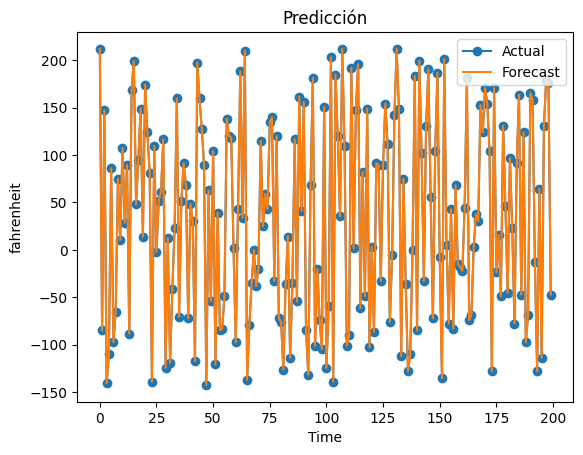

In [ ]:
# Plotting
plt.plot(fahrenheit_test, label='Actual',  marker='o')
plt.plot(y_pred, label='Forecast')

# Formatting
plt.xlabel('Time')
plt.ylabel('fahrenheit')
plt.title('Predicción')
plt.legend()

## Evalucación de las métricas


*   MAE (Mean Absolute Error): El MAE es una medida de la diferencia promedio entre las predicciones del modelo y los valores reales en el conjunto de datos. Es la media de las diferencias absolutas entre cada predicción y su valor correspondiente real.
*   MSE (Mean Squared Error): El MSE también mide la diferencia entre las predicciones y los valores reales, pero en lugar de tomar la diferencia absoluta, eleva cada diferencia al cuadrado antes de tomar el promedio. Esto penaliza más fuertemente las grandes diferencias.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
predicciones = modelo.predict(celsius_test)
mae = mean_absolute_error(fahrenheit_test, predicciones)
mse = mean_squared_error(fahrenheit_test, predicciones)
print(f'MAE: {mae}, MSE: {mse}')

7/7 [==============================] - 0s 2ms/step
MAE: 0.004185568809509262, MSE: 1.7698984162598488e-05


## Hacer una predicción de los datos futuros estimados por la red neuronal y los datos de validación

---



7/7 [==============================] - 0s 2ms/step


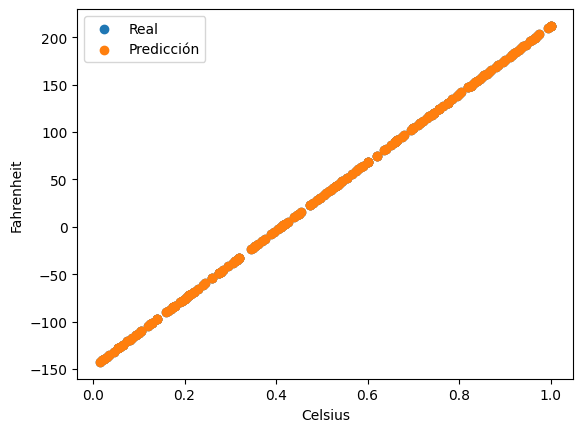

In [ ]:
predicciones = modelo.predict(celsius_test)
plt.scatter(celsius_test, fahrenheit_test, label='Real')
plt.scatter(celsius_test, predicciones, label='Predicción')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.legend()
plt.show()

# Validación con datos externos

Validamos los datos estimados de la red neuronal con los datos externos


1/1 [==============================] - 0s 61ms/step
    Celsius  Fahrenheit  Predicciones_Fahrenheit
0       -50       -58.0            -11699.236328
1       -40       -40.0             -8099.219727
2       -30       -22.0             -4499.205078
3       -20        -4.0              -899.190735
4       -10        14.0              2700.821533
5        -9        15.8              3060.825195
6        -8        17.6              3420.825195
7        -7        19.4              3780.827393
8        -6        21.2              4140.828613
9        -5        23.0              4500.831543
10       -4        24.8              4860.832031
11       -3        26.6              5220.833496
12       -2        28.4              5580.834961
13       -1        30.2              5940.839355
14        0        32.0              6300.837891
15        1        33.8              6660.839844
16        2        35.6              7020.840332
17        3        37.4              7380.839355
18        4      

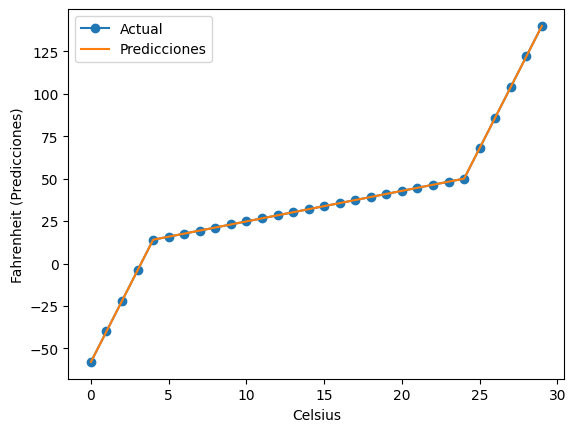

In [ ]:

# Cargar el nuevo conjunto de datos de validación
nuevos_datos = pd.read_csv("Celsius_Fahrenheit_Validación.csv")

# Escalar las características
X_val = nuevos_datos['Celsius'].values.reshape(-1, 1)

X_val_esc = scaler.transform(nuevos_datos['Celsius'].values.reshape(-1, 1))

Y_val_reales = nuevos_datos['Fahrenheit'].values.reshape(-1, 1)

# Realizar predicciones
predicciones = modelo.predict(X_val_esc)

# Desescalar las predicciones
predicciones_desescaladas = scaler.inverse_transform(predicciones)

# Agregar las predicciones al DataFrame original
nuevos_datos['Predicciones_Fahrenheit'] = predicciones_desescaladas

# Mostrar el DataFrame con las predicciones
print(nuevos_datos)

# Visualizar las predicciones
plt.plot(Y_val_reales, label='Actual',  marker='o')
plt.plot(predicciones, label='Predicciones')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit (Predicciones)')
plt.legend()
plt.show()